Impedance in LCR VS I-V curve in potentiostat

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model

from scipy.stats import linregress
from contact_resistance_v2 import idea

sns.set_theme(style = 'ticks', palette = 'deep')


,Spacing ($\mu$m),Resistance (M$\Omega$),Column,Fit
0,0.0002,1.828198e+06,C3,1.662202e+06
1,0.0005,3.605491e+06,C3,3.383206e+06
2,0.0010,6.413693e+06,C3,6.237316e+06
3,0.0020,1.174187e+07,C3,1.189277e+07
4,0.0002,1.842615e+06,C4,1.662202e+06
5,0.0005,3.660956e+06,C4,3.383206e+06
6,0.0010,4.681906e+06,C4,6.237316e+06
7,0.0020,1.257624e+07,C4,1.189277e+07


   Sheet resistance ($\Omega$/sq)  Contact resistance ($\Omega$/sq)  \
0                    1.090152e+11                     255642.907903   

   Conductivity (S/cm)  
0             0.000001  


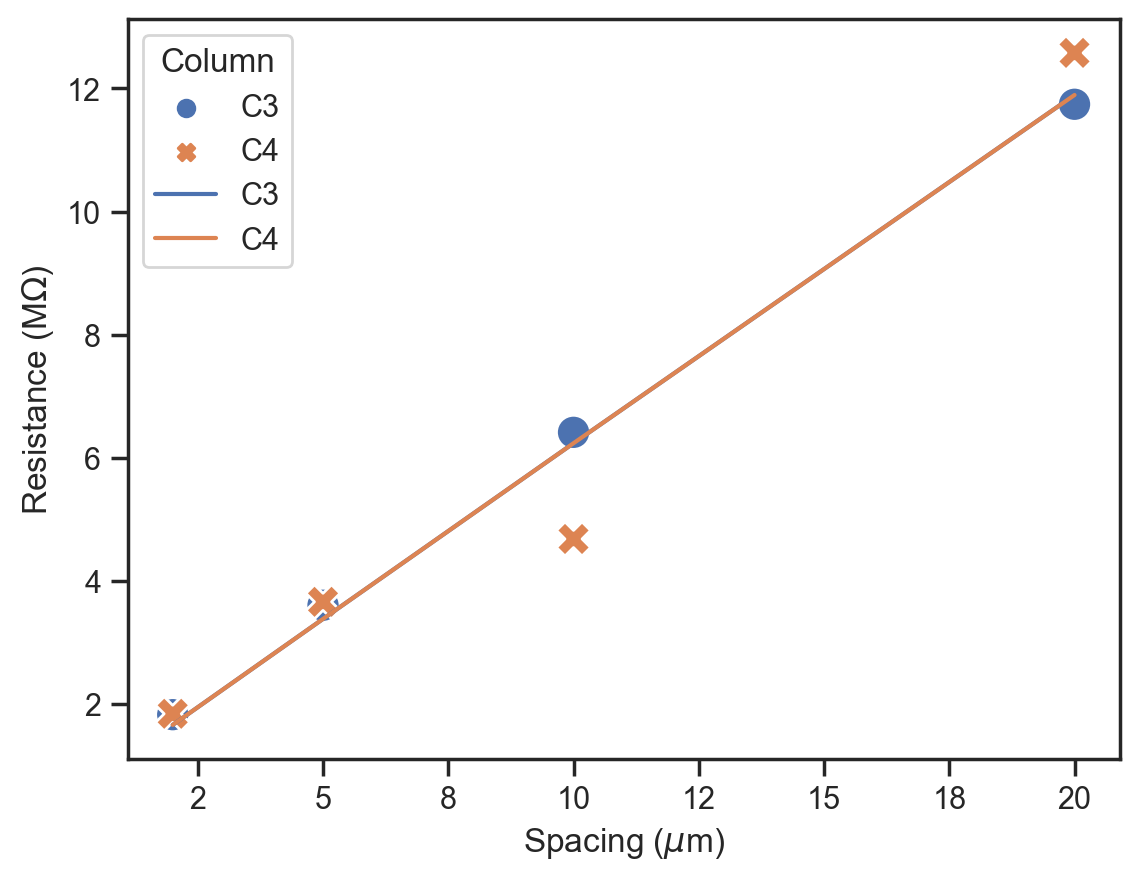

In [11]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_23'
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 80)

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column', s = 150)
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit')#, hue = 'Column')
# ax.plot(tlm['Spacing ($\mu$m)'], tlm['Fit'])
# sns.lineplot(data = tlm, x = )
ax.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))


# # Impedance

# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21\LCR\params.txt'
# col = ['Resistance 1: value',	'Resistance 1: absolute error',	'Resistance 1: relative error',	'CPE Q 1: value',	'CPE Q 1: absolute error',	'CPE Q 1: relative error',	'CPE Alpha 1: value',	'CPE Alpha 1: absolute error',	'CPE Alpha 1: relative error',	'Datasource']
# df = pd.read_csv(path, names = col, skiprows = 3, sep = '\t', usecols = list(range(13, 23)))
# df = df.sort_values(by = ['Datasource'])
# y = [2e-4, 5e-4, 10e-4, 20e-4]

# # fig, ax = plt.subplots(dpi = 200)
# sns.scatterplot(data = df, x = y, y = col[0], label = 'LCR', color = 'k')

display(tlm)
print(val)

In [ ]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21\LCR\spectrum'
col = ["Frequency", "Z'", "Z''", "Fit Frequency", "Fit Z'", "Fit Z''" ]
files = [os.path.join(path, i) for i in os.listdir(path)]
fig, ax = plt.subplots(dpi =200)
ax.set_ylabel("-Z''")
ax.set_xlabel("Z'")
for i in files:
    df = pd.read_csv(i, skiprows=4, sep = '\t', names = col)
    ax.scatter(df[col[1]], -df[col[2]], s = 5)
    ax.plot(df[col[4]], -df[col[5]])

In [ ]:
# Impedance

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21\LCR\params.txt'
col = ['Resistance 1: value',	'Resistance 1: absolute error',	'Resistance 1: relative error',	'CPE Q 1: value',	'CPE Q 1: absolute error',	'CPE Q 1: relative error',	'CPE Alpha 1: value',	'CPE Alpha 1: absolute error',	'CPE Alpha 1: relative error',	'Datasource']
df = pd.read_csv(path, names = col, skiprows = 3, sep = '\t', usecols = list(range(13, 23)))
df = df.sort_values(by = ['Datasource'])
y = [2e-4, 5e-4, 10e-4, 20e-4]

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(data = df, x = y, y = col[0])

df

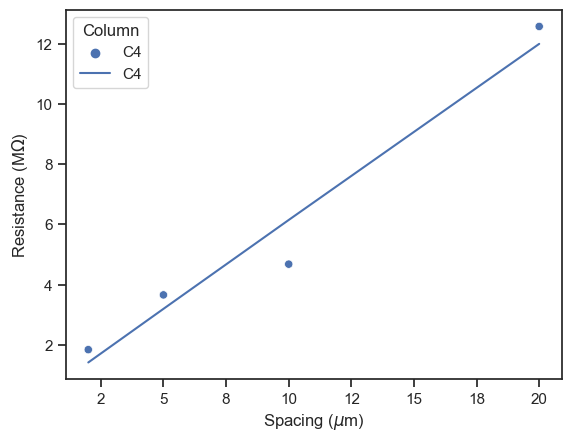

In [7]:
path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_23'
files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]

rt, tlm, val = idea.fit(files_aut, 80)

fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column')
sns.lineplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Fit', hue = 'Column', style = 'Column')
ax.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

Develop of code. It was converted into a class to be object oriented

In [ ]:
col_v = ['Sheet resistance ($\Omega$/sq)', 'Contact resistance ($\Omega$/sq)', 'Conductivity (S/cm)']

# MODEL
def r_t(s, r_s, l_t, N, W, L):
    return (r_s * s / (N * W + (N-1) * (2 *s + L))) + (2 * r_s * l_t / (N * W + (N-1) * (2 *s + L)))

#Create model and parameters
gmodel5 = Model(r_t)
param5 = gmodel5.make_params()
param5['r_s'].set(value = 1e10, min = 0)
param5['l_t'].set(value = 1, min = 0)
param5['L'].set(value = 3200e-4, vary = False)
param5['W'].set(value = 5e-4, vary = False)
param5['N'].set(value = 60, vary = False)


#Impedance
dict = {'P01' : [1.826e6],
        'P02' : [3.3775e6],
        'P03' : [7.042e6],
        'P04' :[ 2.367e7]
        }
columns = ['Spacing', 'Resistance']
df = pd.DataFrame()
df[columns[0]] = [2e-4, 5e-4, 10e-4]# , 20e-4]
df[columns[1]] = [1.826e6, 3.3775e6, 7.042e6]# , 2.367e7]

result = gmodel5.fit(df[columns[1]], param5, s = df[columns[0]])
val_lcr = pd.DataFrame(columns=col_v)
rc2 = gmodel5.eval(result.params, s = 0)
rs = result.values['r_s']
sigma = 1/  (rs * 80 * 1e-7)
val_lcr.loc[0] = [rs, rc2 / 2, sigma]


fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(data = df, x = columns[0], y = columns[1])
sns.scatterplot(data = tlm, x = 'Spacing ($\mu$m)', y = 'Resistance (M$\Omega$)', hue = 'Column', style = 'Column')
ax.plot(df[columns[0]], result.best_fit)
ax.plot(tlm['Spacing ($\mu$m)'], tlm['Fit'])

ax.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x / 1e6))

all = pd.concat([val, val_lcr])
display(all)

In [ ]:
# thickness = 80
# path_lcr = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21\LCR'
# path_aut = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_21\AUT'
# files_lcr = [os.path.join(path_lcr, i) for i in os.listdir(path_lcr)]
# files_aut = [os.path.join(path_aut, i) for i in os.listdir(path_aut)]
# col_aut = ['Potential (V)', 'Current (A)', 'Time (s)']
# col_r = ['Spacing ($\mu$m)', 'Resistance (M$\Omega$)']
# df_aut = pd.DataFrame()
# r_aut = pd.DataFrame(columns = col_r)

